# __INFO 2950: Phase IV__
#### __Group Members:__ Anusha Bishayee, Katheryn Ding

---
### __Introduction:__  

#### How do ESG score and stock performance (price) align across different industries? What associations can we find between company industry, stock performance, and ESG ratings?

#### note: ESG score refers to a quantiative metric measuring a company's environmental, social, and governance performance; 'environmental' pertains to aspects like waste management and energy emissions, 'social' pertains to aspects like customer satisfaction and DEI in the workplace, and 'governance' pertains to aspects like operating efficiencies and risk management. ESG scores are typically examined by independent investors, business analysts, and even competitior companies to assess risk or opportunities associated with a specific company's practices.

In recent years, ESG-focused funds reportedly are attracting billions of dollars in investments annually (Friede, Busch, & Bassen, 2015*), and companies with higher ESG ratings are being perceived as lower-risk and more adaptable to face long-term challenges. on the opposing side, companies who have poorer ESG metrics and practices now may face imminent regulatory risks, damage to reputation, and difficulties in securing capital. by examining how ESG scores are associated with stock performance across different industries, this project aims to determine whether higher ESG scores truly align with better market performance, or if influence varies by industry. This will assist in the quest to make informed decisions on which companies to keep an eye on (and possibly invest in) as ESG influence on worldwide investment decisions heightens. 

The primary ESG data source we used in this case study is published on Kaggle by a user named Alistair King. The kaggle dataset is in .csv format, containing ESG data collected by pulling from ESG Data: ESG Enterprise (https://www.esgenterprise.com/), which is a publicly available API, pulling the Ratings data from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf, and finally, pulling the Financial & Company Data from Finnhub (https://finnhub.io/). Besides from ESG dataset, we imported the yfinance library for stock information, and we joined the ESG data to the yfinance stock data, matching on company ticker. Detailed data cleaning steps are descripbed in Data Desciption part. 

Based on our conclusion, we found statistical significant positive relationship between ESG ratings and the rate of return on stocks at the industry level, affirming the importance of ESG as a meaningful indicator of stock performance at the industry level. It provides actionable insights for investors, policymakers, and corporate leaders, reinforcing the role of sustainability in fostering both economic success and responsible growth. 

*Friede, G., Busch, T., & Bassen, A. (2015). ESG and financial performance: Aggregated evidence from more than 2000 empirical studies. Journal of Sustainable Finance & Investment.)*

---
## __Data Description and Cleaning__

In [179]:
import contextlib
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

---
### __Data Cleaning and Trustworthiness Discussion__

the data cleaning work that produces these files  is found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/data_cleaning.ipynb.

Generally, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. For the 2nd dataset (sample_companies), we stratified and randomly selected 30 specific companies from this main dataset (specific methodology is outlined above in the 'Data Collection and Cleaning' section.

Regarding trustworthiness: This dataset was aggregated and published on Kaggle by a user named Alistair King, who has also published 79 other datasets on the website. They seem to have collected the ESG data by pulling from ESG Data: ESG Enterprise (https://www.esgenterprise.com/), which is a publicly available API, pulling the Ratings data from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf, and finally, pulling the Financial & Company Data from Finnhub (https://finnhub.io/). They state that they “used company stock ticker as a unique identifier, then pulled and collated data from various APIs.” As data was pulled from a number of cited sources, we believe that we can trust this dataset relatively more than some of the other un-cited, un-verified datasets that exist on Kaggle. We also trust this author more after investigating their frequency activity on both Kaggle and Github (they are relatively active on both), as well as seeing the provided citation links for their methodology of creating the dataset. The data was updated within the current year, about 7 months ago. However, this dataset is not particularly tied to any peer-reviewed academic paper or official government publication, which potentially leaves room for concerns about data accuracy. On the other hand, there are no immediate red flags when looking through the dataset and the methodology of creating it. Data most likely was verified for quality when pulling from the above websites to conglomerate the dataset. More description of the data is below.

In [180]:
#import organzed datasets:

avg_esg_by_industry = pd.read_csv("avg_esg_by_industry.csv")
merged_df = pd.read_csv("merged_df.csv")
#sample_companies = pd.read_csv("sample_companies.csv")

---
### __Data Description__
1) Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).

- We have 2 main datasets: 1 main dataset (merged_df), and 1 "sample" dataset that selects 30 rows from this main dataset (sample_companies). We also have a modified version of merged_df (avg_esg_by_industry) which contains extra columns that contain information pertaining to average ESG score by company type - this is mainly used to aid in our intial EDA visualizations. Our raw data for the main 2 datasets can be found on Kaggle, here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20csv%20link and the actual csv is here: https://github.com/anushabishayee/info2950_finalproject/blob/main/esg_data.csv.
- Even more specifically, the Kaggle author states that they pulled the data for their csv from multiple APIs, like ESG Enterprise, a publicly-available API. They grabbed financial and company data from Finnhub. 3 of these links can be found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20source%20data%20links.
***

2) If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

- Individuals are not involved in the data directly, as each observation corresponds to an entire company.

***

3) What preprocessing was done, and how did the data come to be in the form that you are using?

- Our preprocessing of these datasets is detailed above. Generally, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. For the 2nd dataset (sample_companies), we stratified and randomly selected 30 specific companies from this main dataset (specific methodology is outlined above in the 'Data Collection and Cleaning' section. For the 3rd dataset, we extracted the data straight from the yfinance library, and calculated a rate of change variable for the stock change as well for sp500.
- For the Kaggle csv, the author notes that they used company stock ticker as a unique identifier, then pulled and collated data from various APIs. in specific, they utilized ESG Enterprise (https://www.esgenterprise.com/), a publicly-available API, and pulled their ratings methodology from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf. They grabbed financial and company data from Finnhub (https://finnhub.io/).

***

4) What processes might have influenced what data was observed and recorded and what was not?

- For the ESG data, the Kaggle author of the csv specifically mentioned that only mid/large-cap companies are included, so this influences the specific companies that are recorded in the initial data - smaller companies (that also might have an ESG score) will not be 'observed' here. The author pulled data from ESG Enterprise and Finnhub, so any companies that do not have data available there will not be observed in the dataset. We also dropped any company that had a NaN or blank column value for the ESG columns, and dropped any company that didn't have stock data available in Yahoo Finance (or had NaNs for any specific finance column).

***

5) Who funded the creation of the dataset?

- We created these analysis-ready datasets from two data sources: a 'Public Company ESG Ratings Dataset' Kaggle dataset from user Alistair King (https://www.kaggle.com/alistairking), a New York-based Kaggle Datasets Grandmaster, as well as the yfinance Python library, created by Ran Aroussi (https://aroussi.com/) as a way around the 2017 Yahoo Finance API deprecation. It is unclear if these datasets were 'funded', but their organization and accumulation were spearheaded by the two aforementioned people, respectively.

***

6) Why was this dataset created?
- We formulated our main analysis-ready dataset (merged_df) to examine associations between some of the largest USD-utilizing companies' ESG scores and their stock performances (as well as industry-specific analyses). Then, we formulated our sample dataset (sample_companies) so that we could take a look at some company-level analyses of the general data and research question (620 companies are kinda hard to visualize simultaneously). Finally, we formulated the avg_esg_by_industry dataframe as a replica for merged_df, but with extra columns that contain information pertaining to average ESG score by company type for plotting ease. (the rationale for the range of 2/1/21 - 12/31/22 is mentioned above, it's due to the fact that most companies have a 'last processing date' of February 2022 - Novermber 2022 for their ESG score.)
- The original ESG csv was created and uploaded by Kaggle user Alistair King, perhaps for personal enrichment or curiosity (they do have a Kaggle Datasets Grandmaster rank, so perhaps they just enjoy creating and uploading datasets). The original yfinance Python library was created by Ran Aroussi to have a simple way to download historical market data from Yahoo Finance, due to the Yahoo Finance API deprecation.

***

7) What are the observations (rows) and attributes (columns)?
- For both the merged_df and sample_companies dataset, each row corresponds to an unique, mid- to large-cap company that is publicly-traded and utilizes USD. merged_df, our main dataset, has 620 companies, while sample_companies has 30 companies for now. merged_df and sample_companies have the same columns, they are:
+ ticker - a unique combo of letters and numbers that represent a particular stock
+ name - the official name of the company
+ currency - the currency the company is traded in (this was filtered to only be USD)
+ industry - the type of output the company produces
+ environment_grade - a letter score given to the company that measures how well it complies to environmental standards, ranging from AAA being the best to CCC being the worst
+ environment_level - a categorical classification of a company's overall environmental performance (low, medium, high)
+ social_grade - a letter score given to the company that measures how well it complies to social standards, ranging from AAA being the best to CCC being the worst
+ social_level - a categorical classification of a company's overall social performance (low, medium, high)
+ governance_grade - a letter score given to the company that measures how well it complies to governance standards, ranging from AAA being the best to CCC being the worst
+ governance_level - a categorical classification of a company's overall governance performance (low, medium, high)
+ environment_score - a numerical measure of how well a company performs on environment-related factors, ranging from 0-1000
+ social_score - a numerical measure of how well a company performs on social-related factors, ranging from 0-1000
+ governance_score - a numerical measure of how well a company performs on governance-related factors, ranging from 0-1000
+ total_score - a numerical measure of how well a company performs on environment, social, and governance-related factors, ranging from 0-1500]
the following columns are ones that we created, using the yfinance data:
+ percent_change - the percent change in the company stock price from close time on 2/1/21 to close time on 12/31/22 (100 * (end price - start price) / start price))
+ start_close - the closing price of the company stock on 2/1/21
+ end_close - the closing price of the company stock on 12/31/22
+ volatility - standard deviation of daily returns of the company stock, aka the percentage change in the stock price from day to day (indicator of how much stock price fluctuates in a given period, higher volatility is riskier, lower volatility has more stability). specifically, daily return is calculated by closing price on day x+1 - closing price on day x divided by closing price on day x, so all daily returns in the time period 2/1/21-12/31/22 are calculated for the specific company stock, and then the standard deviation is taken to get the volatility
+ 50_day_SMA - 50 day simple moving average, or the sum of closing price of a company stock for the last 50 days before 12/31/22, divided by 50 (if current stock price is above the 50-day SMA, the company is in uptrend, and vice versa)
+ cumulative_return - cumulative return of the company stock over the entire period ((close price on 12/31/22 / close price on 2/1/21) - 1), positive values represent returns, and negative values represent losses

---
### __Data Limitations__

1. ESG is typically evaluated annually, which might mean the scores in our dataset don't reflect the most accurate performance of the company, which directly impacts the analyses and conclusions we might draw from our EDA. in other words, when considering the short-term impact of the company's ESG and other policies, it's likely that policy change affect stocks immediately, but these changes might not also be reflected in the company's ESG rating. Bascially, since ESG scores lag behind the stock fluctuations due to immediate events (mergers, acqusitions, freak events like the CrowdStrike failure), any significant events that occur during 2/1/21-12/31/22 may result in stock price changes that do not perfectly correlate to ESG metrics. This could skew our correlation or regression model analysis, so we want to be careful to not falsely attributing any stock changes to ESG scores (in case of possible confounding variables). As a caveat, we should also be careful not to infer any causal relations when correlation exists.

2. ESG is a constant value that is gathered from different days for each company in 2022, though stock prices for these companies change over time every day. We cannot perform any time-series analyses with ESG due to this fact, which limits what we can do for our final phases and EDA.
   
3. Due to the nature of the Kaggle csv and yfinance data, our data is restricted to the variable types of stock data, industry type, company name, and ESG score - which actually does help us narrow down the scope of our research question, but limits the breadth of the analyses we can perform as well.
   
4. Some specific data from the yfinance library is missing - we had to drop all companies that didn't have the specified data we wanted in our specified time range. We also had to drop all companies from the original ESG csv that had missing or blank data. Overall, this means that our analyses will not be perfectly representative of all companies that use USD and have an ESG rating (can't perfectly generalize to the population). Additionally, we filtered our original ESG dataframe to be just companies traded in USD, so we can't do any inter-country comparison (although this also helps us narrow the scope of our project). Since we are also only using companies that are existent and large/mid-cap within 2/1/21 - 12/31/22, any company that stopped their operations in this time frame will be excluded. In other words, our findings might disproportionally overestimate the relationship between ESG scores and stock performance (companies that went bankrupt or have poor ESG / financial outcomes are not represented, which might skew interpretation of ESG positively).


## __Preregistration Statements__

### __Preregistration Statement 1__
#### Hypothesis 1: 
Industries with higher total ESG scores will have generally better stock performances.

#### Analysis 1: 
According to La Torre, Mango, Cafaro, and Leo (2020), “panel data analysis demonstrates that the ‘ESG Overall index’ has, in general, a statistically significant and positive impact on returns (on a company level).” We would like to use our dataset to explore if there is statistical evidence showing ESG’s correlation with stock return on an industry level. To achieve this, we will run both Linear Regression and Logistic Regression where we input the average total ESG scores [‘Average Total ESG Score’, from avg_esg_by_industry ] for each industry, and output the expected stock performance (both for the stock rate of change over the time period [percent_change] and the stock 50-Day Simple Moving Average [50_day_SMA], which are two different dimensions illustrating financial / stock performance). In this case, we want to test if βESG > 0 at a significance level of 0.05 - this will be 4 different tests.


### __Preregistration Statement 2__
#### Hypothesis 2
Industries with "High" ESG levels (defined as total_esg_level='BBB') exhibit a stronger correlation between their stock's rate of change (`percentage_change`) and the total ESG score (`total_score`) compared to industries with "Low" or "Medium" ESG levels (defined as total_esg_level='BB' or total_esg_level='B'). We hypothesize that this pattern will hold across the full dataset (`merged_df`).

#### Analysis 2
To evaluate whether ESG score levels are more strongly correlated with stock return rates in industries with higher ESG scores, we will compare the correlation coefficients between stock rate of change (percentage_change) and total ESG score (total_score) for two groups: industries with "High" ESG levels (total_esg_level='BBB') and industries with "Low" or "Medium" ESG levels (total_esg_level='BB' or total_esg_level='B'). This analysis will be performed separately on the full dataset (merged_df) and the sample dataset (sample_companies).

We will first calculate the Pearson correlation coefficients for each group, measuring the strength of the linear relationship between percentage_change and total_score. The null hypothesis states that the correlation coefficient for industries with "High" ESG levels is equal to the correlation coefficient for industries with "Low" or "Medium" ESG levels. The alternative hypothesis is that the correlation coefficient for industries with "High" ESG levels and industries with 'Low' or 'Medium' ESG levels are different.

To test the difference between the two correlation coefficients, we will apply the Fisher Z-transformation, which converts correlation coefficients into z-scores. We will determine whether the difference between the correlation coefficients for the two groups is statistically significant at a 95% confidence level (α=0.05). If the test reveals a significant difference, we will conclude that industries with "High" ESG levels exhibit a different correlation between stock rate of change and total ESG scores compared to industries with "Low" or "Medium" ESG levels. If the difference is not statistically significant, we will fail to reject the null hypothesis. 


### __Preregistration Statement 3__
#### Hypothesis 3:
Industries with "High" ESG levels (defined as total_esg_level='BBB') exhibit a higher average rate of change in stock price compared to industries with "Low" or "Medium" ESG levels (defined as total_esg_level='BB' or total_esg_level='B'). We hypothesize that this trend will hold across the full dataset (`merged_df`).

#### Analysis 3:
Based on the findings from Friede, G., Busch, T., & Bassen, A. (2015), which identify a positive relationship between ESG performance and company performance in over 2,100 studies, we aim to test whether industries with higher ESG levels demonstrate significantly higher rates of change in stock price.

To test this hypothesis, we will divide the dataset into two groups: industries with high ESG levels (total_esg_level='BBB') and industries with low or medium ESG levels (total_esg_level='BB' or total_esg_level='B'). We will calculate the mean rate of change in stock price for both groups and compare them using a one-tailed z-test to determine whether the average rate of change for industries with high ESG levels is significantly greater than that for industries with low or medium ESG levels.

The null hypothesis states that industries with high ESG levels have an equal or lower average rate of change in stock price compared to industries with low or medium ESG levels. The alternative hypothesis states that industries with high ESG levels have a significantly higher average rate of change in stock price. The test will be conducted at a 95% confidence level (α=0.05). If the test result indicates that the difference is statistically significant, we will conclude that industries with high ESG levels exhibit a significantly higher average rate of change in stock price compared to those with low or medium ESG levels. If not, we will fail to reject the null hypothesis.

---
## __Data Analysis__

### __Analysis 1__

In [181]:
industry_data = merged_df.groupby('industry').agg({
    'total_score': 'mean',
    'percentage_change': 'mean',
    '50_day_SMA': 'mean'}).rename(columns = {'total_score': 'average_total_esg_score'})

scaler = StandardScaler()
industry_data['average_total_esg_score_scaled'] = scaler.fit_transform(industry_data[['average_total_esg_score']])

X_linear_pc = industry_data[['average_total_esg_score_scaled']]
y_linear_pc = industry_data['percentage_change']
X_linear_pc = sm.add_constant(X_linear_pc)  

linear_model_pc = sm.OLS(y_linear_pc, X_linear_pc).fit()
print("LINEAR regression results for PERCENTAGE CHANGE:")
print(linear_model_pc.summary())

median_pc = industry_data['percentage_change'].median()
industry_data['PC_performance'] = (industry_data['percentage_change'] > median_pc).astype(int)

X_logistic_pc = industry_data[['average_total_esg_score_scaled']]
y_logistic_pc = industry_data['PC_performance']

logistic_model_pc = LogisticRegression()
logistic_model_pc.fit(X_logistic_pc, y_logistic_pc)

print("LOGISTIC regression coefficients for PERCENTAGE CHANGE:")
print(f"intercept: {logistic_model_pc.intercept_[0]}")
print(f"coeff for ESG score: {logistic_model_pc.coef_[0][0]}")

y_pred_pc = logistic_model_pc.predict(X_logistic_pc)
print("\nclassifaction report for LOGISTIC regression model for PERCENTAGE CHANGE:")
print(classification_report(y_logistic_pc, y_pred_pc))

X_linear_sma = industry_data[['average_total_esg_score_scaled']]
y_linear_sma = industry_data['50_day_SMA']
X_linear_sma = sm.add_constant(X_linear_sma) 



linear_model_sma = sm.OLS(y_linear_sma, X_linear_sma).fit()
print("LLINEAR regression results for 50-DAY-SMA:")
print(linear_model_sma.summary())

median_sma = industry_data['50_day_SMA'].median()
industry_data['SMA_performance'] = (industry_data['50_day_SMA'] > median_sma).astype(int)

X_logistic_sma = industry_data[['average_total_esg_score_scaled']]
y_logistic_sma = industry_data['SMA_performance']

logistic_model_sma = LogisticRegression()
logistic_model_sma.fit(X_logistic_sma, y_logistic_sma)

print("LOGISTIC regression coefficients for 50-DAY-SMA PERFORMANCE")
print(f"Intercept: {logistic_model_sma.intercept_[0]}")
print(f"Coefficient for ESG Score: {logistic_model_sma.coef_[0][0]}")

y_pred_sma = logistic_model_sma.predict(X_logistic_sma)
print("\nclassification report for LOGISTIC regression model for 50-DAY SMA:")
print(classification_report(y_logistic_sma, y_pred_sma))





print("\n--- hyp testing for LINEAR regression ---")
for label, model, dependent_var in [
    ("Percentage Change", linear_model_pc, 'percentage_change'),
    ("50-Day SMA", linear_model_sma, '50_day_SMA')
]:
    esg_coefficient = model.params['average_total_esg_score_scaled']
    esg_standard_error = model.bse['average_total_esg_score_scaled']

    t_statistic = esg_coefficient / esg_standard_error
    p_value_one_tailed = 1 - stats.t.cdf(t_statistic, df=model.df_resid)

    print(f"\nLINEAR regression test for βESG > 0 ({label})")
    print(f"dep var: {dependent_var}")
    print(f"ESG coeff: {esg_coefficient}")
    print(f"t-stat: {t_statistic}")
    print(f"p-value: {p_value_one_tailed}")

    if p_value_one_tailed < 0.05:
        print(f"We can reject the null hypothesis: ESG has a positive effect on {dependent_var}.")
    else:
        print(f"We fail to reject the null hypothesis: There is no significant positive effect of ESG on {dependent_var}.")

print("\n--- hyp testing for LOGISTIC regression ---")
for label, X_logistic, y_logistic in [
    ("Percentage Change", X_logistic_pc, y_logistic_pc),
    ("50-Day SMA", X_logistic_sma, y_logistic_sma)
]:
    X_logistic_sm = sm.add_constant(X_logistic)  
    logit_model = sm.Logit(y_logistic, X_logistic_sm).fit()
    print(logit_model.summary())

    esg_logit_p_value_one_tailed = logit_model.pvalues['average_total_esg_score_scaled'] / 2
    print(f"\np-value for ESG coeff in LOGISTIC regression ({label}): {esg_logit_p_value_one_tailed}")

    if esg_logit_p_value_one_tailed < 0.05:
        print(f"We can reject the null hypothesis: ESG has a positive effect on {label} classification.")
    else:
        print(f"We fail to reject the null hypothesis: There is no significant positive effect of ESG on {label} classification.")

LINEAR regression results for PERCENTAGE CHANGE:
                            OLS Regression Results                            
Dep. Variable:      percentage_change   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     13.07
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           0.000812
Time:                        14:58:07   Log-Likelihood:                -199.69
No. Observations:                  43   AIC:                             403.4
Df Residuals:                      41   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

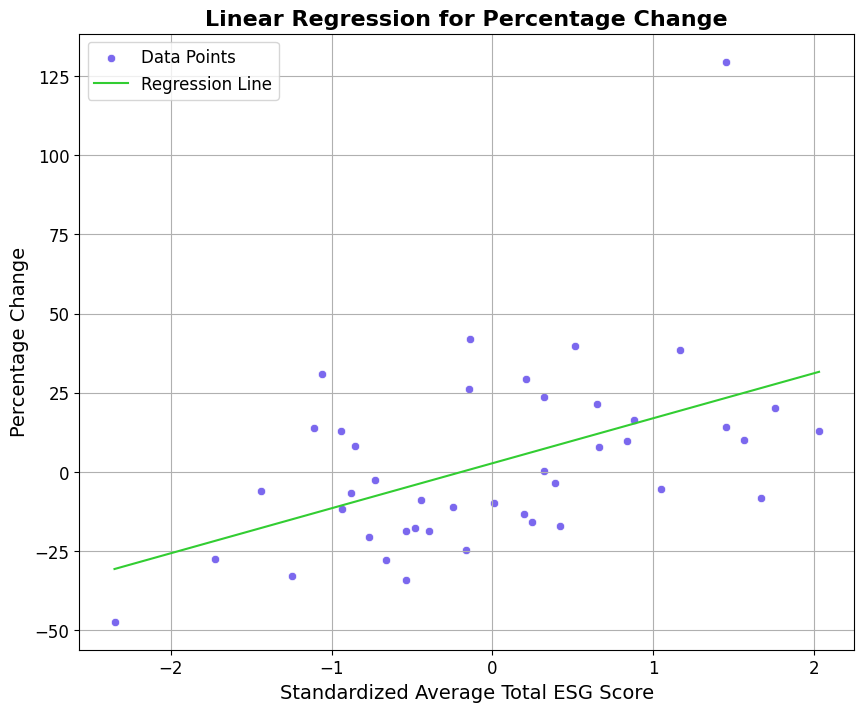

In [182]:
# Plot for linear regression with percentage change

plt.figure(figsize = (10, 8))
sns.scatterplot(x = industry_data['average_total_esg_score_scaled'], y = industry_data['percentage_change'], color = 'mediumslateblue', label = 'Data Points')
sns.lineplot(x = industry_data['average_total_esg_score_scaled'], 
             y = linear_model_pc.predict(X_linear_pc), 
             color = 'limegreen', label = 'Regression Line')
plt.title('Linear Regression for Percentage Change', fontsize = 16, fontweight = 'bold')
plt.xlabel('Standardized Average Total ESG Score', fontsize = 14)
plt.ylabel('Percentage Change', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

# describe the plot

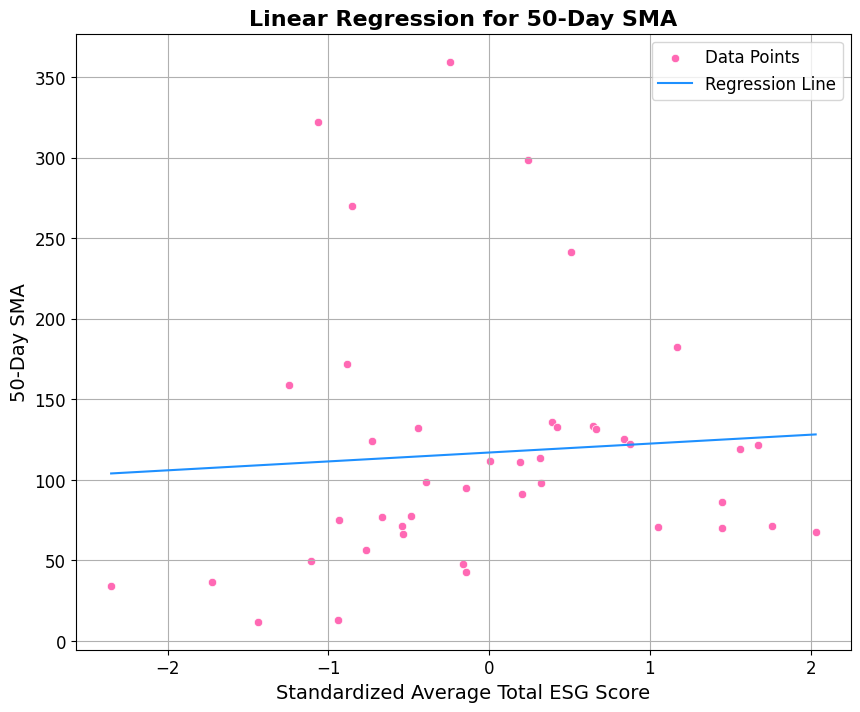

In [183]:
#Plot for linear regression with 50-day SMA

plt.figure(figsize = (10, 8))
sns.scatterplot(x = industry_data['average_total_esg_score_scaled'], y = industry_data['50_day_SMA'], color = 'hotpink', label = 'Data Points')
sns.lineplot(x = industry_data['average_total_esg_score_scaled'], 
             y = linear_model_sma.predict(X_linear_sma), 
             color = 'dodgerblue', label = 'Regression Line')
plt.title('Linear Regression for 50-Day SMA', fontsize = 16, fontweight = 'bold')
plt.xlabel('Standardized Average Total ESG Score', fontsize = 14)
plt.ylabel('50-Day SMA', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()


# add description to plot

### __Analysis 2__

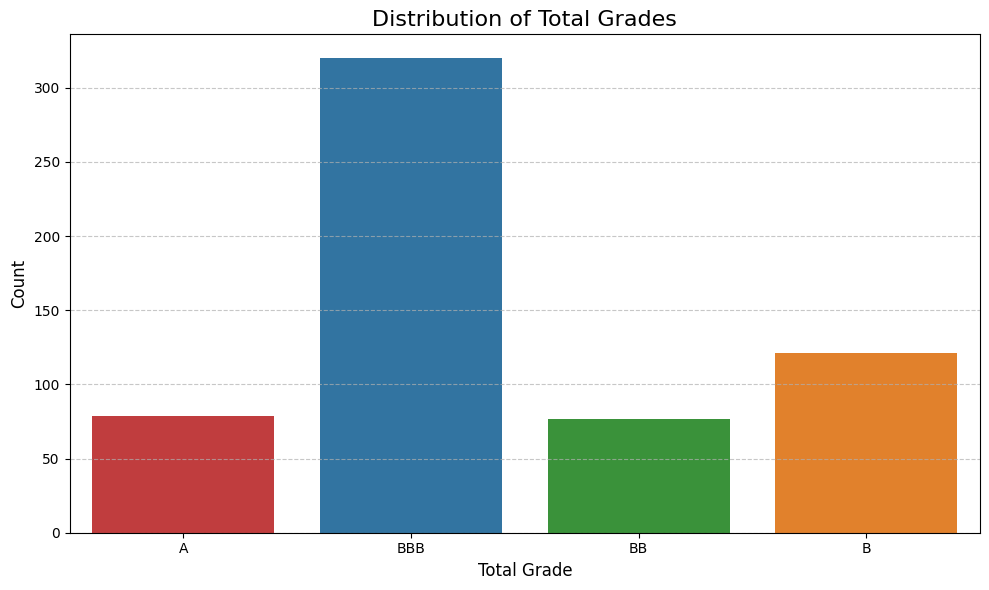

In [184]:
grade_order = ['A', 'BBB', 'BB', 'B']

# Plot the bar chart with the specified order
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='total_grade', order=grade_order, hue='total_grade')
plt.title('Distribution of Total Grades', fontsize=16)
plt.xlabel('Total Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Plot Description:  
   
For Hypothesis 2, we're dividing industries into two categories: high/ low in 'total_grade', which represents the total esg grade for companies. This bar chart visualizes the distribution of companies based on their total ESG grades, categorized into four distinct grades: A, BBB, BB, and B. The x-axis represents the ESG grades, while the y-axis indicates the count of companies within each grade category. The grade 'BBB' dominates the distribution with the highest count, followed by 'B', while grades 'A' and 'BB' have relatively lower counts. This plot inform the number of companies in each esg grade. In the following code chrunk, we will define "A" and "BBB" to "high" esg grade, "BB" and "B" as "not high" esg grade. 

In [185]:
# Data preparation
# dividing data to two sets: total_grade==BBB or A(high ESG level), total_grade= B or BB (median or low ESG level)
pop_high = merged_df[(merged_df['total_grade'] == 'BBB') | (merged_df['total_grade'] == 'A')]
pop_not_high = merged_df[(merged_df['total_grade'] == 'BB') | (merged_df['total_grade'] == 'B')]
#generate Correlation array between total_score and percentage_change
pop_r_high = pop_high['percentage_change'].corr(pop_high['total_score'])
pop_r_not_high = pop_not_high['percentage_change'].corr(pop_not_high['total_score'])

#size of high/ not_high subsets
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

#create correlation matrix
corr_bbb = pop_high[["percentage_change", "total_score"]].corr()
corr_bb_b = pop_not_high[["percentage_change", "total_score"]].corr()


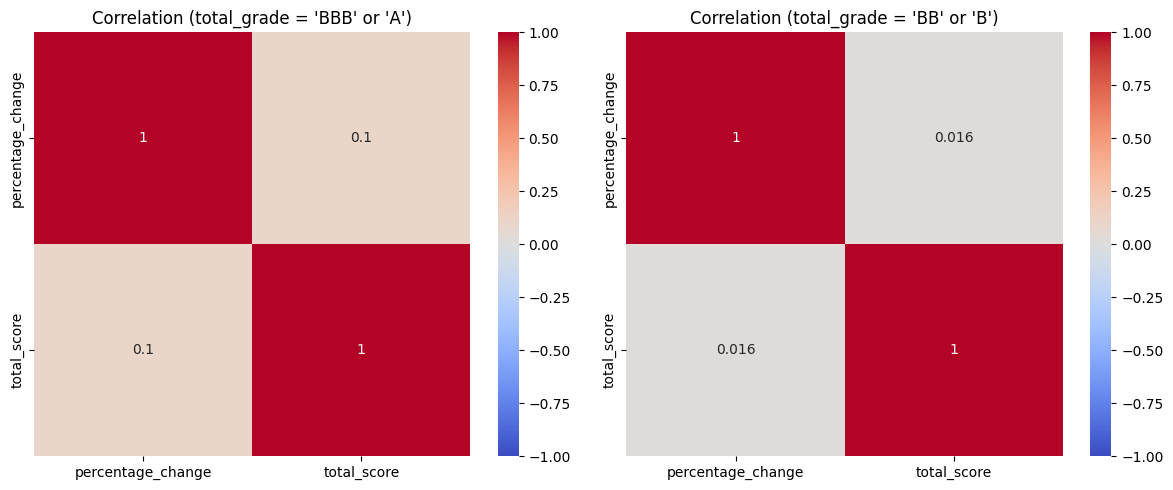

In [186]:
# visualize the correlation plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(corr_bbb, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Correlation (total_grade = 'BBB' or 'A')")
sns.heatmap(corr_bb_b, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Correlation (total_grade = 'BB' or 'B')")
plt.tight_layout()
plt.show()

Plot Explaination:    
According to the Correlation plot, the correlation between 'total_score' and 'percentage_change' for companies with high total_grade is 0.1, and the correlation between "total_score" and "percentage_change" for companies with low total_grade is 0.016, which differs, but in order to test if this difference is statistically significant, we're going to run a z-test.

In [187]:
def z_test_correlation(n1, r1, n2, r2, alpha=0.05):
    """
    Perform Z-test for the difference between two correlation coefficients.
    
    Parameters:
    n1 (int): Sample size of the first group
    r1 (float): Correlation coefficient of the first group
    n2 (int): Sample size of the second group
    r2 (float): Correlation coefficient of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in correlations
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Convert correlation coefficients to Z scores
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    
    # Step 2: Calculate the SE for the difference in Z scores
    se_diff = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    
    # Step 3: Calculate the Z score for the difference between the two correlation coefficients
    z_score = (z1 - z2) / se_diff
    print(f"Z-score is : {z_score}")
    
    # Step 4: Calculate the p-value (two-tailed)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print(f'P value is: {p_value}')
    
    if p_value < alpha:
        interpretation = "The difference in correlation coefficients is statistically significant."
    else:
        interpretation = "The difference in correlation coefficients is not statistically significant."
    
    return interpretation

In [188]:
#perform z-test:
## full dataset(merged_df)
z_test_correlation(pop_n_high, pop_r_high, pop_n_not_high, pop_r_not_high)

Z-score is : 0.9995327943626411
P value is: 0.31753666085369225


'The difference in correlation coefficients is not statistically significant.'

### __Analysis 3__

In [189]:
# Plot of the mean percentage_change on total_grade


In [190]:
## Data Preparation for analysis 3 hypothesis test
#percentage_change mean for each group
pop_return_high = pop_high['percentage_change'].mean()
pop_return_not_high = pop_not_high['percentage_change'].mean()
#percentage_chanege std for each groups
pop_return_high_std = pop_high['percentage_change'].std()
pop_return_not_high_std = pop_not_high['percentage_change'].std()
# sample sizes for each group
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

<function matplotlib.pyplot.show(close=None, block=None)>

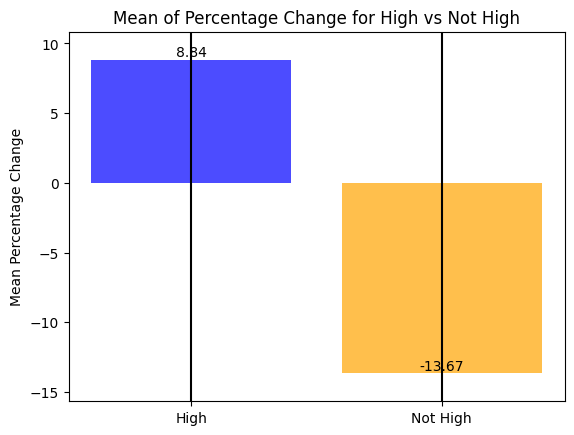

In [191]:
# Bar Plot of the mean percentage_change on total_grade
categories = ['High', 'Not High']
means = [pop_return_high, pop_return_not_high]
std_devs = [pop_return_high_std, pop_return_not_high_std]

bars=plt.bar(categories, means, yerr=std_devs, capsize=5, alpha=0.7, color=['blue', 'orange'])
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{mean:.2f}', ha='center')

plt.ylabel('Mean Percentage Change')
plt.title('Mean of Percentage Change for High vs Not High')
plt.ylim(min(means)-2, max(means) + 2)
plt.show

Plot Description:  
   
This bar chart visualizes the mean percentage change for two groups: "High" and "Not High." The "High" group has a positive mean percentage change of 8.84, while the "Not High" group has a negative mean percentage change of -13.67. The y-axis represents the mean percentage change. There is a clear difference between the mean of percentage change between the two group, but in order to test if this difference is statistically significant, we're going to run a z-test on the group means.

In [192]:
def z_test_mean_greater(mean1, std1, n1, mean2, std2, n2, alpha=0.05):
    """
    Perform one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group.
    
    Parameters:
    mean1 (float): Mean of the first group
    std1 (float): Standard deviation of the first group
    n1 (int): Sample size of the first group
    mean2 (float): Mean of the second group
    std2 (float): Standard deviation of the second group
    n2 (int): Sample size of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in means
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Calculate the standard error of the difference between the means
    se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Step 2: Calculate the Z score for the difference between the two means
    z_score = (mean1 - mean2) / se_diff
    print(f"Z-score is : {z_score}")
    # Step 3: Calculate the p-value (one-tailed test)
    p_value = 1 - norm.cdf(z_score)  # Only interested in the probability of mean1 > mean2
    print(f'P value is: {p_value}')
    # Step 4: Interpretation
    if p_value < alpha:
        interpretation = "The mean of the first group is significantly greater than the mean of the second group."
    else:
        interpretation = "The mean of the first group is not significantly greater than the mean of the second group."
    
    return interpretation

In [193]:
#Hypothesis 3 test 
z_test_mean_greater(pop_return_high, pop_return_high_std, pop_n_high, pop_return_not_high, pop_return_not_high_std, pop_n_not_high)

Z-score is : 4.003564469539066
P value is: 3.11975937089537e-05


'The mean of the first group is significantly greater than the mean of the second group.'

## __Evaluation of Significance__

### Hypothesis 1:
For the Linear Regression models, we found that the ESG coefficients for both percentage change and the 50-Day Simple Moving Average (SMA) were both positive, but only percentage change was statistically significant at the 0.05 level. Specifically, the one-tailed p-value (0.458010) for the coefficient of ESG for the 50-Day-SMA perfformance exceeded 0.05, (our chosen significance level), so there was insufficient evidence to reject the null hypothesis. However, percentage change seemed to be highly significant, judging by the p-value of 0.000406. Similarly, for the Logistic Regression models, the ESG coefficients for predicting above-median performance in percentage change and 50-Day SMA were positive for both metrics, but was only statistically significant for percentage change (with a p-value of 0.006216). the 50-Day-SMA test did not have statistical significance, as demonstrated by the p-value of 0.111194, which is greater than than 0.05. these results suggest that while there may be a positive trend between ESG score and stock performance, it is perhaps robust enough to confirm a significant impact of ESG scores on total stock performance at the industry level, and perhaps only percentage change should be examined in this association.


### Hypothesis 2:
We tested the relationship between the level of correlation and the total ESG level of industries in both the full dataset (`merged_df`). However, the z-test yielded a p-value of 0.3175 for the population test, which are greater than the significance level (α=0.05), indicating no statistically significant evidence to reject the null hypothesis that there is no difference in the correlation between ESG total score and stock returns across different ESG levels.  
   
Given the lack of significant differences in correlation levels, we decided to shift our focus from correlation levels to examining the direct relationship between ESG levels and stock returns. This approach provides deeper insights and aligns more closely with our research objective, which seeks to explore the associations between industry, stock performance, and ESG ratings. Therefore, we added a new hypothesis onto our analysis (prior to actually running it, so there is no concern of p-hacking)
 

### Hypothesis 3:
We tested whether the average rate of return for industries with a "High" total ESG level (`total_grade='A'` or `total_grade='BBB'`) is greater than that for industries with "Low" total ESG levels (`total_grade='BB'` or `total_grade='B'`). 
      
The hypothesis was formulated as follows:   
    __Null Hypothesis (H0​)__: The average rate of return for industries with a "High" ESG level is less than or equal to the average rate of   the return for industries with "Low" ESG levels.   
    __Alternative Hypothesis (HA)__: The average rate of return for industries with a "High" ESG level is significantly greater than that for industries with "Medium" or "Low" ESG levels.    
    
The one-tail z-test produced a p-value of 0.00003, which is well below the significance level (α=0.05). This result provides significant statistical evidence to reject the null hypothesis and conclude that industries with a "High" ESG level have a significantly greater average rate of return compared to industries with "Low" ESG levels.   
This finding aligns with prior studies suggesting a positive relationship between higher ESG performance and improved financial outcomes, further supporting the notion that industries with stronger ESG profiles may deliver superior stock performance.   








--- 
## __Conclusions__ 

In regards to the first analysis, we can conclude that our hypothesis that industries with higher total ESG scores experience better stock performance is partially supported. In specific, our hypothesis testing indicates a significant positive relationship between ESG scores and stock percentage change (in particular), as shown by the highly significant p-values in both the linear and logistic regression analyses. This suggests that ESG scores might play a significant role in influencing stock performance in terms of percentage change only. However, we were not able to provide statistical significance for the ESG coefficients that predicting 50-Day-SMA performance, which implies  the relationship between ESG scores and stock performance as measured by 50-Day-SMA performance is not as robust. Thus, we have evidence for the claim that ESG scores are a relevant factor for some dimensions of financial performance, but their overall impact on industry-level stock performance should utilize further exploration, especially for oother metrics beyond percentage change. In other words, while our analysis shows that higher ESG scores are positively associated with stock performance in terms of percentage change, the same relationship does not expand to all stock performance metrics, such as 50-Day-SMA performance. By exploring additional variables, we could potentially better understand how ESG scores serve as a driver of overall stock performance, not just percentage change, at the industry level.


Our analysis also revealed a statistically significant positive relationship between ESG ratings and the rate of return on stocks at the industry level. Specifically, industries with a "High" total ESG level (BBB) exhibited a significantly higher average rate of return compared to those with "Medium" or "Low" ESG levels (BB or B). This finding is consistent with previous research by La Torre, Mango, Cafaro, and Leo (2020) and Friede, Busch, and Bassen (2015), which suggests that stronger ESG performance is positively associated with improved financial outcomes. By focusing on industry-level trends, our study provides new insights into how ESG considerations drive broader market performance beyond individual firm volatility.    
   
At the same time, our analysis of the differences in correlation strength between ESG levels and stock returns revealed no statistically significant evidence. This suggests that the relationship between ESG scores and stock returns remains relatively consistent across ESG levels.    
   
These findings emphasize the strategic value of ESG as a predictor of financial growth. Industries with higher ESG ratings demonstrate that integrating sustainable practices is not just an ethical imperative but offers financial advantage. This supports the notion that ESG considerations are becoming critical to competitive advantage in capital markets. Investors can leverage ESG ratings to identify industries with strong growth potential, while policymakers and corporate leaders can use these insights to emphasize ESG initiatives as drivers of both sustainable development and financial success. Our study’s focus on the industry level offers a fresh perspective, moving beyond firm-specific analyses and highlighting ESG’s macroeconomic impact. Future studies could investigate the causal pathways linking ESG performance to financial outcomes, explore time-lagged effects of ESG improvements, or examine industry-specific and regional differences in ESG’s impact on stock performance.   
   
In conclusion, our research affirms the importance of ESG as a meaningful indicator of stock performance at the industry level. It provides actionable insights for investors, policymakers, and corporate leaders, reinforcing the role of sustainability in fostering both economic success and responsible growth.   

---
## __Limitations__ 

1. Our original data might not perfectly fit linear or logistic patterns, yet we applied regression models as a near-estimate relationship, this might result in us rejecting the null hypothesis when we shouldn’t in actuality, also known as Type 1 error (see the Analysis section where one regression line fits data rather well, but the other one.. not so much).
2. For our first pre registration statement, we wanted to look at both the measures of financial return and 50-day SMA and test if there was a significant difference between companies that have higher ESG and lower ESG for these specific metrics. We found that financial return had a significant difference, but we were unable to conclude the same for 50 day SMA, which means that technically we are not able to conclude that companies with higher ESG scores always outperform other companies in terms of financial metrics, only in terms of stock percentage change/return in this case.
3. Once again, our analysis focuses on stock metric performance from a limited timespan, which might not really capture the long-term effects of ESG strategies and decisions on financial performance. Additionally, stock performance is often influenced by external economic conditions and social factors, which might overshadow or overstate the impact of ESG score. Overall, this might lead to the harm of results that don't really generalize well across different years or economic cycles.
4. As we aggregate ESG score and stock performance at the industry level, we run the risk of obscuring intra-industry flucations or trends: aka companies with higher ESG scores within a single industry might outperform the other companies in the industry. This same effect might be diminished when they are averaged with the lower-performing companies, which might affect the interpretation of our results. In specific, our finding interpretations might underestimate the benefits of ESG score and targeted strategies upon economic performance.


---
## __Acknowledgements and Bibliography__ 

To run our hypothesis tests and create our models, we referenced the lecture slides as well as some external resources. As we are both Statistical Science majors (with one of us also being an Economics major), we are familiar with regression methods and hypothesis testing, so we did not consult office hours or Ed Discussion for this portion. For help in writing the code (specifically, the sections where we created our own function to help in running a statistical test), we utilized ChatGPT, with the first prompt for Analysis 1 akin to “how can we devise our own function in Python that will perform a Z-test for the difference between two correlation coefficients? We want to include the standardization of the correlation coefficients to z scores, calculate the z scores for the difference in correlation coefficients,  and calculate the two-tailed p-value. We also want to include an interpretation, where if we obtain a p-value less than 0.05, we can reject the null hypothesis, but if we do not, then we fail to reject the null hypothesis.” We repeated this prompt for the second part of Analysis 2, but instead, we asked for “a function that performs a one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group. Initially, we searched the python documentation to see if there was already a function or library that would run the test of means, and decided to write our own to best suit our needs for this project, We were confident in the code outputted by ChatGPT as we are both familiar with the overall methodology of performing a statistical test by hand, and the generated code had all of the specific steps that we specified and that are normally included in the process.     
    
To determine which pre registration statements and analyses are commonly investigated when dealing with these variables, we consulted a number of external sources prior to completing Phase 3. For each of our pre registration statements, we consulted:   
      
    1)  La Torre M, Mango F, Cafaro A, Leo S. Does the ESG Index Affect Stock Return? Evidence from the Eurostoxx50. Sustainability. 2020; 12(16):6387. https://doi.org/10.3390/su12166387    

    2)  Friede, G., Busch, T., & Bassen, A. (2015). ESG and financial performance: aggregated evidence from more than 2000 empirical studies. Journal of Sustainable Finance & Investment, 5(4), 210–233. https://doi.org/10.1080/20430795.2015.1118917    
    
These sources allowed us to understand what types of analyses are normally performed when testing financial metrics for significant changes, and informed our own hypothesis test choices.